In [3]:
import torch # Used to crate tensor to storer all of the numerical values including the raw data
import torch.nn as nn # Used to make the weights and bias tensor part of the neural network

In [4]:
from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

In [5]:
import lightning as L

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## Ex. "Troll 2 is great!
## Gymkata is great!

In [8]:
## One-hot encodding

# input
## Ex. "Troll 2 is great!
# [[ 1., 0., 0., 0.], Troll 2
 # [ 0., 1., 0., 0.], is
 # [ 0., 0., 1., 0.], great
 # [ 0., 0., 0., 1.]] Gymkata

# input
inputs = torch.tensor([[ 1., 0., 0., 0.],[ 0., 1., 0., 0.], [ 0., 0., 1., 0.], [ 0., 0., 0., 1.]])

# ouput
## Ex. "Troll 2 is great!
# [[ 0., 1., 0., 0.], is
 # [ 0., 0., 1., 0.], great
 # [ 0., 0., 0., 1.], Gymkata
 # [ 0., 1., 0., 0.]] is

labels = torch.tensor([[ 0., 1., 0., 0.],[ 0., 0., 1., 0.], [ 0., 0., 0., 1.], [ 0., 1., 0., 1.]])


In [9]:
dataset = TensorDataset(inputs, labels)

In [10]:
dataloader = DataLoader(dataset)

In [9]:
class WordEmbeddingFromScratch(L.LightningModule):
    def __init__(self):
        # Create and initialize Weight tensor, and create the loss function.
        super().__init__() # inherit from paret class

        min_value = -0.5
        max_value = 0.5
        
        # input weights
        self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        # ouput weights
        self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.loss = nn.CrossEntropyLoss()

    
    def forward(self, input):
        # Make a forward pass trhough the network
        input = input[0]
        inputs_to_top_hidden = ((input[0] * self.input1_w1) +
                                (input[1] * self.input2_w1) +
                                (input[2] * self.input3_w1) +
                                (input[3] * self.input4_w1))


        inputs_to_bottm_hidden = ((input[0] * self.input1_w2) +
                                  (input[1] * self.input2_w2) +
                                  (input[2] * self.input3_w2) +
                                  (input[3] * self.input4_w2))
        
        # activation functiion é uma matrix identidade neste caso, então posso passar os valores diretamente
        
        output_1 = ((inputs_to_top_hidden * self.output1_w1) + (inputs_to_bottm_hidden * self.output1_w2))
        output_2 = ((inputs_to_top_hidden * self.output2_w1) + (inputs_to_bottm_hidden * self.output2_w2))
        output_3 = ((inputs_to_top_hidden * self.output3_w1) + (inputs_to_bottm_hidden * self.output3_w2))
        output_4 = ((inputs_to_top_hidden * self.output4_w1) + (inputs_to_bottm_hidden * self.output4_w2))

        output_presoftmax = torch.stack([output_1, output_2, output_3, output_4])
        return(output_presoftmax)

    def configure_optimizers(self):
        # Configure Adan optimizer
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        # Calculate the loss, (cross entropy loss functin quantify the diff between the predicted value Y_ and the real value Y
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i[0])**2
        return loss

In [10]:
modelFromScratch = WordEmbeddingFromScratch()

In [11]:
print("Befor optimization, the parametter are ...")
for name, param in modelFromScratch.named_parameters():
    print(name, param.data)

Befor optimization, the parametter are ...
input1_w1 tensor(0.4722)
input1_w2 tensor(0.3719)
input2_w1 tensor(0.3057)
input2_w2 tensor(-0.0142)
input3_w1 tensor(-0.0980)
input3_w2 tensor(0.2886)
input4_w1 tensor(0.1874)
input4_w2 tensor(0.3963)
output1_w1 tensor(0.4733)
output1_w2 tensor(0.0241)
output2_w1 tensor(0.4701)
output2_w2 tensor(0.0171)
output3_w1 tensor(0.0529)
output3_w2 tensor(0.2254)
output4_w1 tensor(0.1004)
output4_w2 tensor(0.3177)


In [12]:
data = {
    "w1": [modelFromScratch.input1_w1.item(),
           modelFromScratch.input2_w1.item(),
           modelFromScratch.input3_w1.item(),
           modelFromScratch.input4_w1.item()],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(),
           modelFromScratch.input3_w2.item(),
           modelFromScratch.input4_w2.item()],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.47222,0.371890,Troll2,input1
1,0.30573,-0.014249,is,input2
2,-0.09797,0.288594,great,input3
3,0.18744,0.396285,Gymkata,input4


Text(0.18743950128555298, 0.3962850570678711, 'Gymkata')

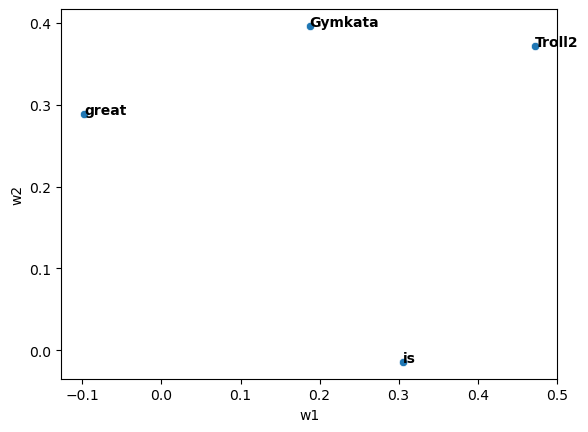

In [13]:
# Ploting the graph
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3], horizontalalignment='left', size='medium', color='black', weight='semibold')

In [ ]:
trainer = L.Trainer(max_epochs=10)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [11]:
class WordEmbeddingWithLinear(L.LightningModule):
    def __init__(self):
        # Create and initialize Weight tensor, and create the loss function.
        super().__init__() # inherit from paret class
        self.inputs_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)
        self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)

        self.loss = nn.CrossEntropyLoss()
    
    def forward(self, input):
        # Make a forward pass trhough the network
        hidden = self.inputs_to_hidden(input)
        output_values = self.hidden_to_output(hidden)

        return(output_values)

    def configure_optimizers(self):
        # Configure Adan optimizer
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        # Calculate the loss, (cross entropy loss functin quantify the diff between the predicted value Y_ and the real value Y
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i)
        return loss

In [13]:
modelLinear = WordEmbeddingWithLinear()

In [ ]:
data = {
    "w1": modelLinear.inputs_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.inputs_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
trainer = L.Trainer(max_epochs=10)
trainer.fit(modelLinear, train_dataloaders=dataloader)